                                     url rozloha kompozicia   cena               adresa
0  https://www.sreality.cz/detail/zlin/1   54 m²       2+kk  16500    Jarošova 12, Zlín
1  https://www.sreality.cz/detail/zlin/2   68 m²        3+1  19500    Ševcovská 8, Zlín
2  https://www.sreality.cz/detail/zlin/3   42 m²        1+1  13500      Tyršova 3, Zlín
3  https://www.sreality.cz/detail/zlin/4   75 m²       3+kk  22000      Sadová 15, Zlín
4  https://www.sreality.cz/detail/zlin/5   50 m²        2+1  15000  Komenského 25, Zlín
                                     url  rozloha kompozicia   cena               adresa          ulica mesto
0  https://www.sreality.cz/detail/zlin/1       54       2+kk  16500    Jarošova 12, Zlín    Jarošova 12  Zlín
1  https://www.sreality.cz/detail/zlin/2       68        3+1  19500    Ševcovská 8, Zlín    Ševcovská 8  Zlín
2  https://www.sreality.cz/detail/zlin/3       42        1+1  13500      Tyršova 3, Zlín      Tyršova 3  Zlín
3  https://www.sreality.cz/detai

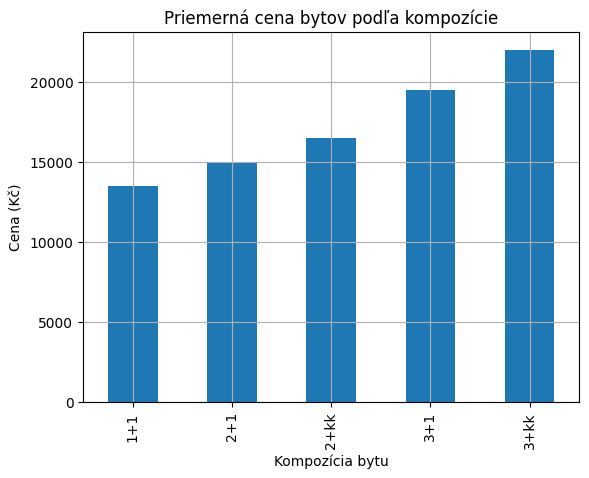

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.width", 200) # pandas hovoríme že môže použiť 200 znakov na riadok pri vystupe - aby sa výystup zobrazoval pekne

df = pd.read_csv("simulovane_byty.csv")
print(df.head()) #dr.head() zobrazí prvých 5 riadkov z tabuľky ak by sme chceli napr 10 tak rint(df.head(10))

# Odstránim " m²" a prevediem na celé číslo (int)
df["rozloha"] = df["rozloha"].str.replace(" m²", "").astype(int)

# cenu dávame na int - formátujeme bunky na číslo prakticky
df["cena"] = df["cena"].astype(int)

# Rozdelenie stĺpca "adresa" podľa čiarky na dva nové stĺpce
df[["ulica", "mesto"]] = df["adresa"].str.split(",", expand=True)
# Odstránenie prípadných medzier okolo
df["ulica"] = df["ulica"].str.strip()
df["mesto"] = df["mesto"].str.strip()

# Výpis pre kontrolu
print(df.head())

#analyza
priemerne_ceny = df.groupby("kompozicia")["cena"].mean()
pocet = df.groupby("kompozicia")["cena"].count()
suma = df.groupby("kompozicia")["cena"].sum()

print(priemerne_ceny)
print(pocet)
print(suma)

# Vytvorenie grafu
priemerne_ceny.plot(kind="bar")

# Pridanie názvu a popisov
plt.title("Priemerná cena bytov podľa kompozície")
plt.xlabel("Kompozícia bytu")
plt.ylabel("Cena (Kč)")
plt.grid(True)

# Zobrazenie grafu
plt.show()